# Coffee House Customer Retention

## Data Modelling

### Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df = pd.read_csv('./data/transformed_data.csv')
df

,age,employment status,annual income,coffee visits,time spent,distance,membership,avg. spent,quality,price,...,wifi,service,meetups,satisfied,gender_Female,gender_Male,mode_Dine in,mode_Drive-thru,mode_Never,mode_Take away
0,2,3,0,3,1,2,1,1,4,3,...,4,4,3,1,1,0,1,0,0,0
1,2,3,0,3,0,0,1,1,4,3,...,4,5,2,1,1,0,0,0,0,1
2,2,0,0,1,1,1,1,1,4,3,...,4,4,3,1,0,1,1,0,0,0
3,2,3,0,3,0,1,0,1,2,1,...,3,3,3,0,1,0,0,0,0,1
4,2,3,0,1,1,0,0,0,3,3,...,2,3,3,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,2,3,1,2,0,1,0,3,3,...,2,4,4,1,0,1,1,0,0,0
117,2,0,0,1,2,0,1,2,5,5,...,5,5,5,1,0,1,1,0,0,0
118,2,3,0,3,1,0,0,1,3,2,...,3,3,4,0,0,1,1,0,0,0
119,2,0,0,3,0,2,0,1,4,4,...,4,4,4,1,1,0,0,0,0,1


### Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('satisfied', axis=1), df['satisfied'], test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 21), (25, 21), (96,), (25,))

In [4]:
def calculate_metrics(model, X_test, y_test):
    print("Best parameters:", model.best_params_)
    print("Best CV score:", abs(model.best_score_))
    
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    print('Confusion Matrix', '\n', cnf_matrix)
    print('Classification Report', '\n', clf_report)

    return {'accuracy_score': accuracy_score(y_test, y_pred),
            'precision_score': precision_score(y_test, y_pred),
            'recall_score': recall_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'fpr': fpr,
            'tpr': tpr,
            'auc': auc}

In [5]:
classifiers = {}

### Logistic Regression

In [6]:
logistic_model = LogisticRegression()
logistic_grid = GridSearchCV(
    estimator=logistic_model, 
    param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear']
    },
    n_jobs=-1,
    cv=5)
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear']})

In [7]:
classifiers['logistic_regression'] = calculate_metrics(logistic_grid, X_test, y_test)

Best parameters: {'C': 0.001, 'solver': 'liblinear'}
Best CV score: 0.7710526315789474
Confusion Matrix 
 [[ 0  5]
 [ 0 20]]
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.80      1.00      0.89        20

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



### Decision Tree Classifier

In [8]:
dt_classifier = DecisionTreeClassifier()
dt_grid = GridSearchCV(
    estimator=dt_classifier, 
    param_grid={
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    n_jobs=-1,
    cv=5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [9]:
classifiers['decision_tree_classifier'] = calculate_metrics(dt_grid, X_test, y_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV score: 0.75
Confusion Matrix 
 [[ 3  2]
 [ 0 20]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.91      1.00      0.95        20

    accuracy                           0.92        25
   macro avg       0.95      0.80      0.85        25
weighted avg       0.93      0.92      0.91        25



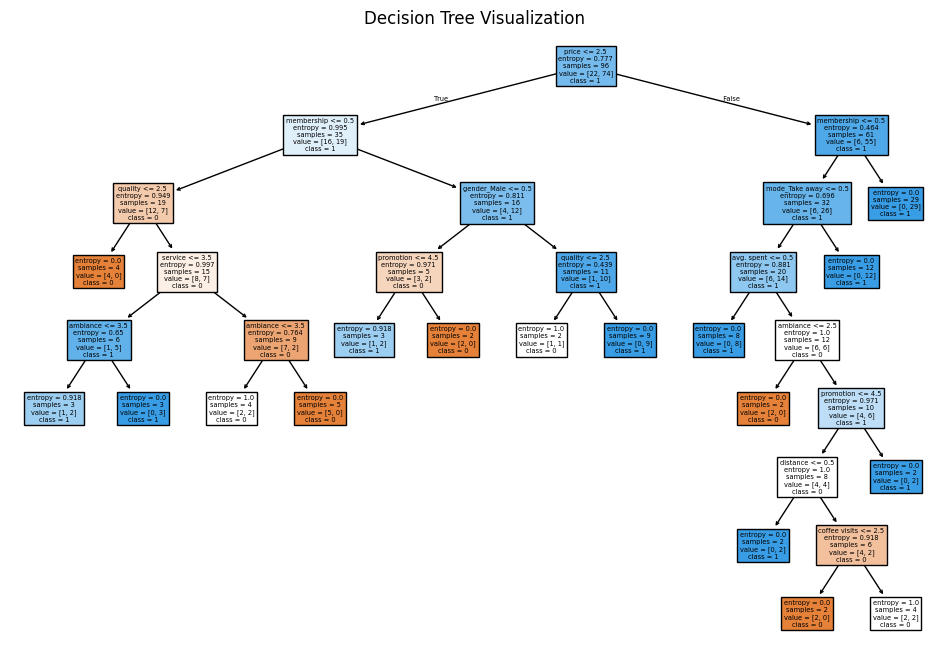

In [10]:
# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_grid.best_estimator_, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### RandomForest Classifier

In [11]:
rf_classifier = RandomForestClassifier()
rf_grid = GridSearchCV(
    estimator=rf_classifier, 
    param_grid={
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'criterion': ['gini', 'entropy']
    },
    n_jobs=-1,
    cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [12]:
classifiers['randomforest_classifier'] = calculate_metrics(rf_grid, X_test, y_test)

Best parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best CV score: 0.7821052631578947
Confusion Matrix 
 [[ 3  2]
 [ 0 20]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.91      1.00      0.95        20

    accuracy                           0.92        25
   macro avg       0.95      0.80      0.85        25
weighted avg       0.93      0.92      0.91        25



### Support Vector Classifier

In [13]:
sv_classifier = SVC()
sv_grid = GridSearchCV(
    estimator=sv_classifier, 
    param_grid={
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    n_jobs=-1,
    cv=5)
sv_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [14]:
classifiers['svc'] = calculate_metrics(sv_grid, X_test, y_test)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best CV score: 0.7710526315789474
Confusion Matrix 
 [[ 0  5]
 [ 0 20]]
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.80      1.00      0.89        20

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



#### Naive Bayes Classifier

In [15]:
naive_classifier = GaussianNB()
naive_grid = GridSearchCV(
    estimator=naive_classifier, 
    param_grid={},
    n_jobs=-1,
    cv=5)
naive_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1, param_grid={})

In [16]:
classifiers['naive_classifier'] = calculate_metrics(naive_grid, X_test, y_test)

Best parameters: {}
Best CV score: 0.718421052631579
Confusion Matrix 
 [[ 3  2]
 [ 1 19]]
Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.90      0.95      0.93        20

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25



### KNN Classifier

In [17]:
knn_classifier = KNeighborsClassifier()
knn_grid = GridSearchCV(
    estimator=knn_classifier, 
    param_grid={
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    n_jobs=-1,
    cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

In [18]:
classifiers['knn_classifier'] = calculate_metrics(knn_grid, X_test, y_test)

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}
Best CV score: 0.74
Confusion Matrix 
 [[ 1  4]
 [ 0 20]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.83      1.00      0.91        20

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25



### GBM Classifier

In [19]:
gbm_classifier = GradientBoostingClassifier()
gbm_grid = GridSearchCV(
    estimator=gbm_classifier, 
    param_grid={
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    n_jobs=-1,
    cv=5)
gbm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [20]:
classifiers['gbm_classifier'] = calculate_metrics(gbm_grid, X_test, y_test)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best CV score: 0.7505263157894737
Confusion Matrix 
 [[ 0  5]
 [ 0 20]]
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.80      1.00      0.89        20

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



### AdaBoost Classifier

In [21]:
adaboost_classifier = AdaBoostClassifier()
adaboost_grid = GridSearchCV(
    estimator=adaboost_classifier, 
    param_grid={
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    n_jobs=-1,
    cv=5)
adaboost_grid.fit(X_train, y_train)

/Users/musabshaikh/Documents/Github/virtual-envs/ds-venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/musabshaikh/Documents/Github/virtual-envs/ds-venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/musabshaikh/Documents/Github/virtual-envs/ds-venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/musabshaikh/Documents/Github/virtual-envs/ds-venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]})

In [22]:
classifiers['adaboost_classifier'] = calculate_metrics(adaboost_grid, X_test, y_test)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best CV score: 0.781578947368421
Confusion Matrix 
 [[ 3  2]
 [ 0 20]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.91      1.00      0.95        20

    accuracy                           0.92        25
   macro avg       0.95      0.80      0.85        25
weighted avg       0.93      0.92      0.91        25



### ROC Curve

logistic_regression {'accuracy_score': 0.8, 'precision_score': np.float64(0.8), 'recall_score': np.float64(1.0), 'f1_score': np.float64(0.8888888888888888), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'auc': np.float64(0.5)}
decision_tree_classifier {'accuracy_score': 0.92, 'precision_score': np.float64(0.9090909090909091), 'recall_score': np.float64(1.0), 'f1_score': np.float64(0.9523809523809523), 'fpr': array([0. , 0.4, 1. ]), 'tpr': array([0., 1., 1.]), 'auc': np.float64(0.8)}
randomforest_classifier {'accuracy_score': 0.92, 'precision_score': np.float64(0.9090909090909091), 'recall_score': np.float64(1.0), 'f1_score': np.float64(0.9523809523809523), 'fpr': array([0. , 0.4, 1. ]), 'tpr': array([0., 1., 1.]), 'auc': np.float64(0.8)}
svc {'accuracy_score': 0.8, 'precision_score': np.float64(0.8), 'recall_score': np.float64(1.0), 'f1_score': np.float64(0.8888888888888888), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'auc': np.float64(0.5)}
naive_classifier {'accuracy_score': 0

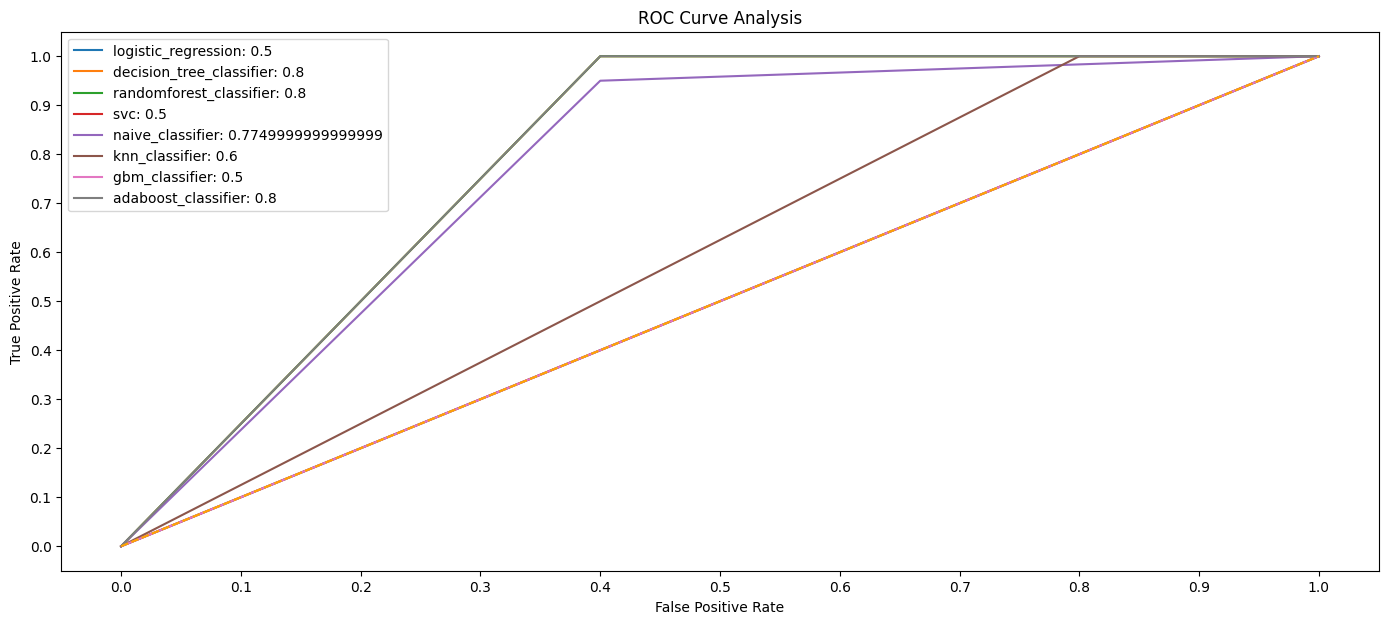

In [23]:
plt.figure(figsize=(17,7))

for r in classifiers.keys():
    print(r, classifiers[r])
    plt.plot(classifiers[r]['fpr'], classifiers[r]['tpr'], label=f"{r}: {classifiers[r]['auc']}")

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate')

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate')

plt.title("ROC Curve Analysis")
plt.legend()

plt.show()

### Feature Importance

<Axes: xlabel='Importance', ylabel='Feature'>

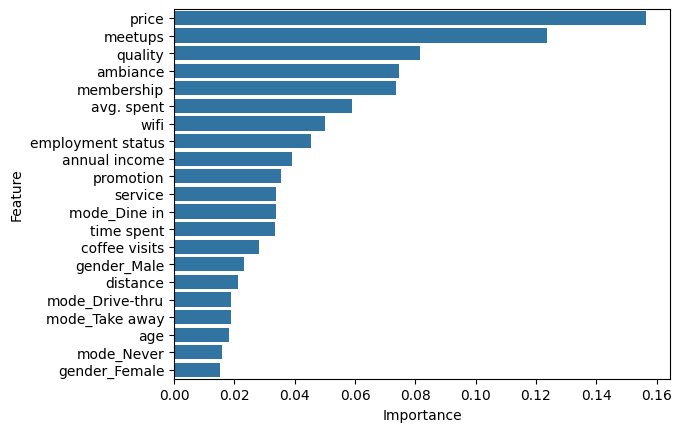

In [25]:
feature_importances_gbm = rf_grid.best_estimator_.feature_importances_

sns.barplot(data=pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_gbm
}).sort_values(by='Importance', ascending=False), y='Feature', x='Importance')

### Conclusion

- Most of the customer retention is due to `price`. If the customers are satisfied with the price, it increases the chances of customer coming back for more.
- Second important feature is `quality`. It should be ensured that the customers are satisfied with the quality of the items
- The third important features are `meetups` and `promotion`. The coffee shops should advertise and promote promotions and create a environment of social engagement. This would have a big impact not only on customer retention, but also on attracting new customers.